In [105]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_absolute_error


In [27]:
df = pd.read_csv('archive/tracks.csv')


In [28]:
df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [30]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [32]:
df.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.027681,0.211758,0.187000,0.302315,0.015299,0.327028,-0.033655,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759
duration_ms,0.027681,1.000000,-0.016747,-0.120371,0.024825,0.004626,0.000337,-0.027610,-0.125771,-0.064434,0.069278,0.002137,-0.163202,-0.001210,0.037552
explicit,0.211758,-0.016747,1.000000,0.150229,0.123076,0.010932,0.134603,-0.051754,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745,0.044447
danceability,0.187000,-0.120371,0.150229,1.000000,0.241563,0.018824,0.251436,-0.044719,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196
energy,0.302315,0.024825,0.123076,0.241563,1.000000,0.036294,0.764735,-0.065246,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983
key,0.015299,0.004626,0.010932,0.018824,0.036294,1.000000,0.027109,-0.129491,-0.001035,-0.027414,-0.006776,-0.006774,0.019992,0.004904,0.008928
loudness,0.327028,0.000337,0.134603,0.251436,0.764735,0.027109,1.000000,-0.040464,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377
mode,-0.033655,-0.027610,-0.051754,-0.044719,-0.065246,-0.129491,-0.040464,1.000000,-0.017992,0.058918,-0.010008,0.007009,0.011474,0.007871,-0.015892
speechiness,-0.047357,-0.125771,0.102258,0.199310,-0.053506,-0.001035,-0.167112,-0.017992,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171
acousticness,-0.370882,-0.064434,-0.149018,-0.242951,-0.715412,-0.027414,-0.519423,0.058918,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927


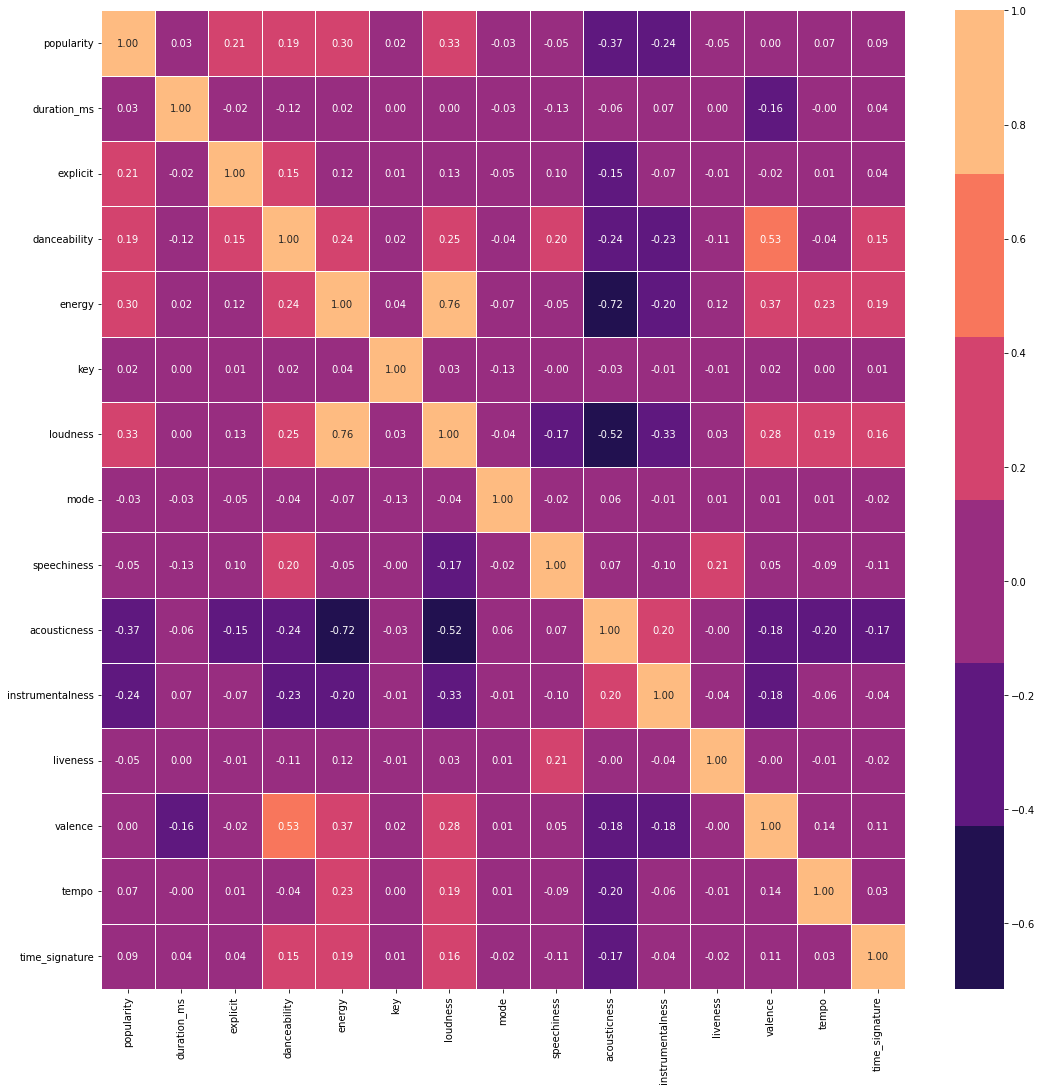

In [37]:
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".2f", cmap=sns.color_palette("magma"), linewidths=1)

plt.show()

In [47]:
series = np.abs(df.corr()['popularity']).sort_values(ascending=False)


for i, row in enumerate(series):
    print(f"{series.index[i]:20} --> {row:.2f}")



popularity           --> 1.00
acousticness         --> 0.37
loudness             --> 0.33
energy               --> 0.30
instrumentalness     --> 0.24
explicit             --> 0.21
danceability         --> 0.19
time_signature       --> 0.09
tempo                --> 0.07
liveness             --> 0.05
speechiness          --> 0.05
mode                 --> 0.03
duration_ms          --> 0.03
key                  --> 0.02
valence              --> 0.00


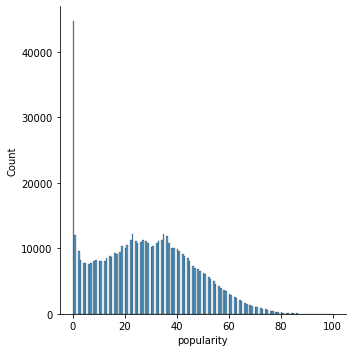

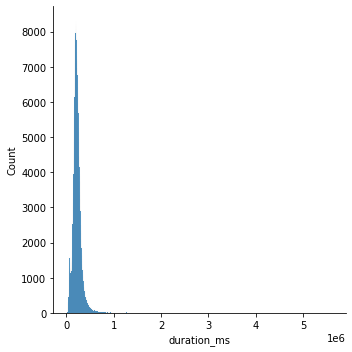

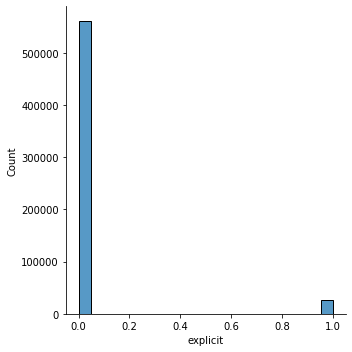

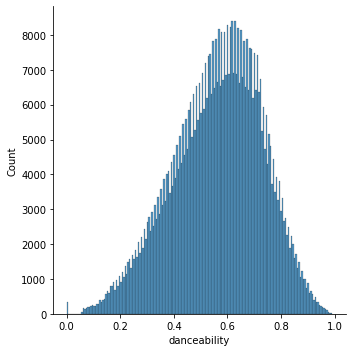

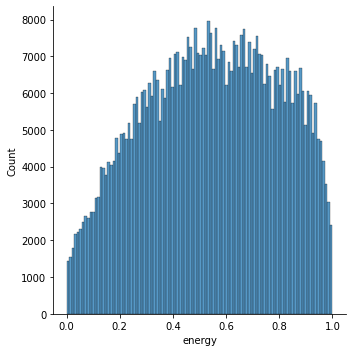

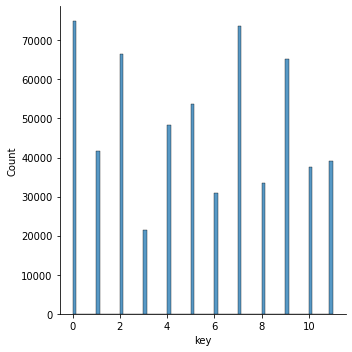

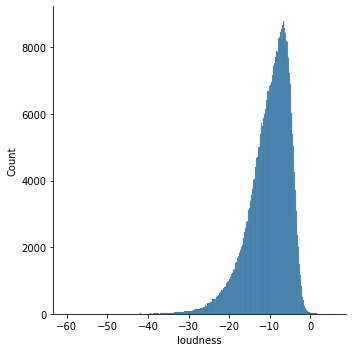

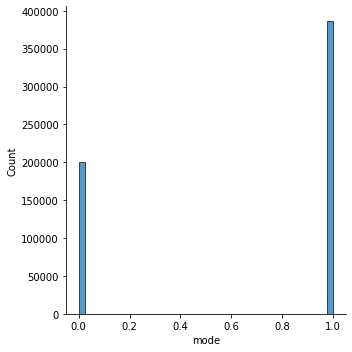

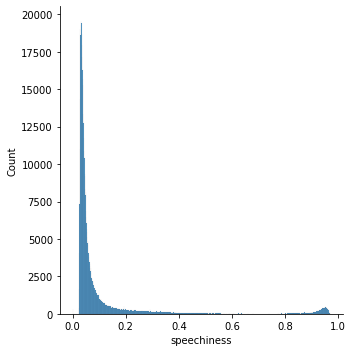

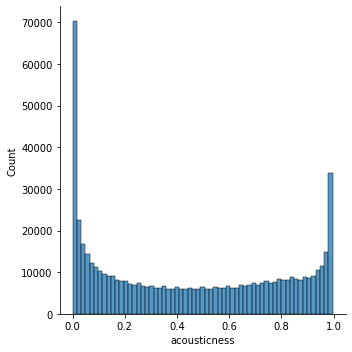

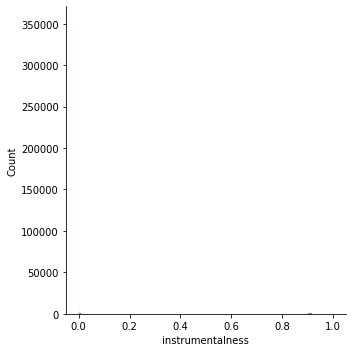

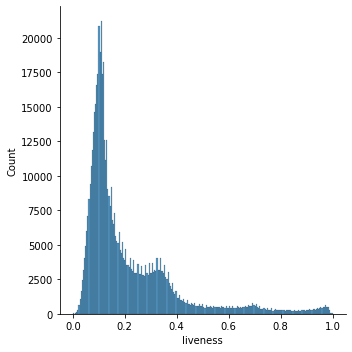

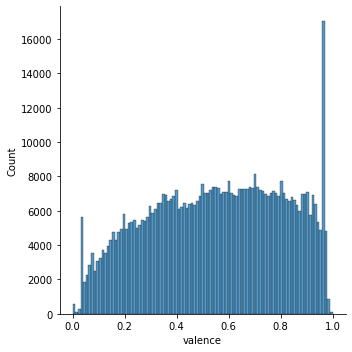

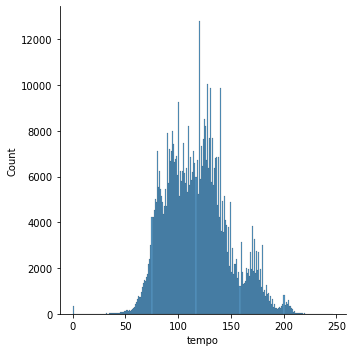

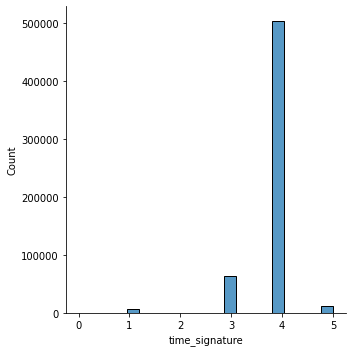

In [51]:
numerical_features = df.select_dtypes(include=np.number)

for col in numerical_features.columns:
    sns.displot(df[col])

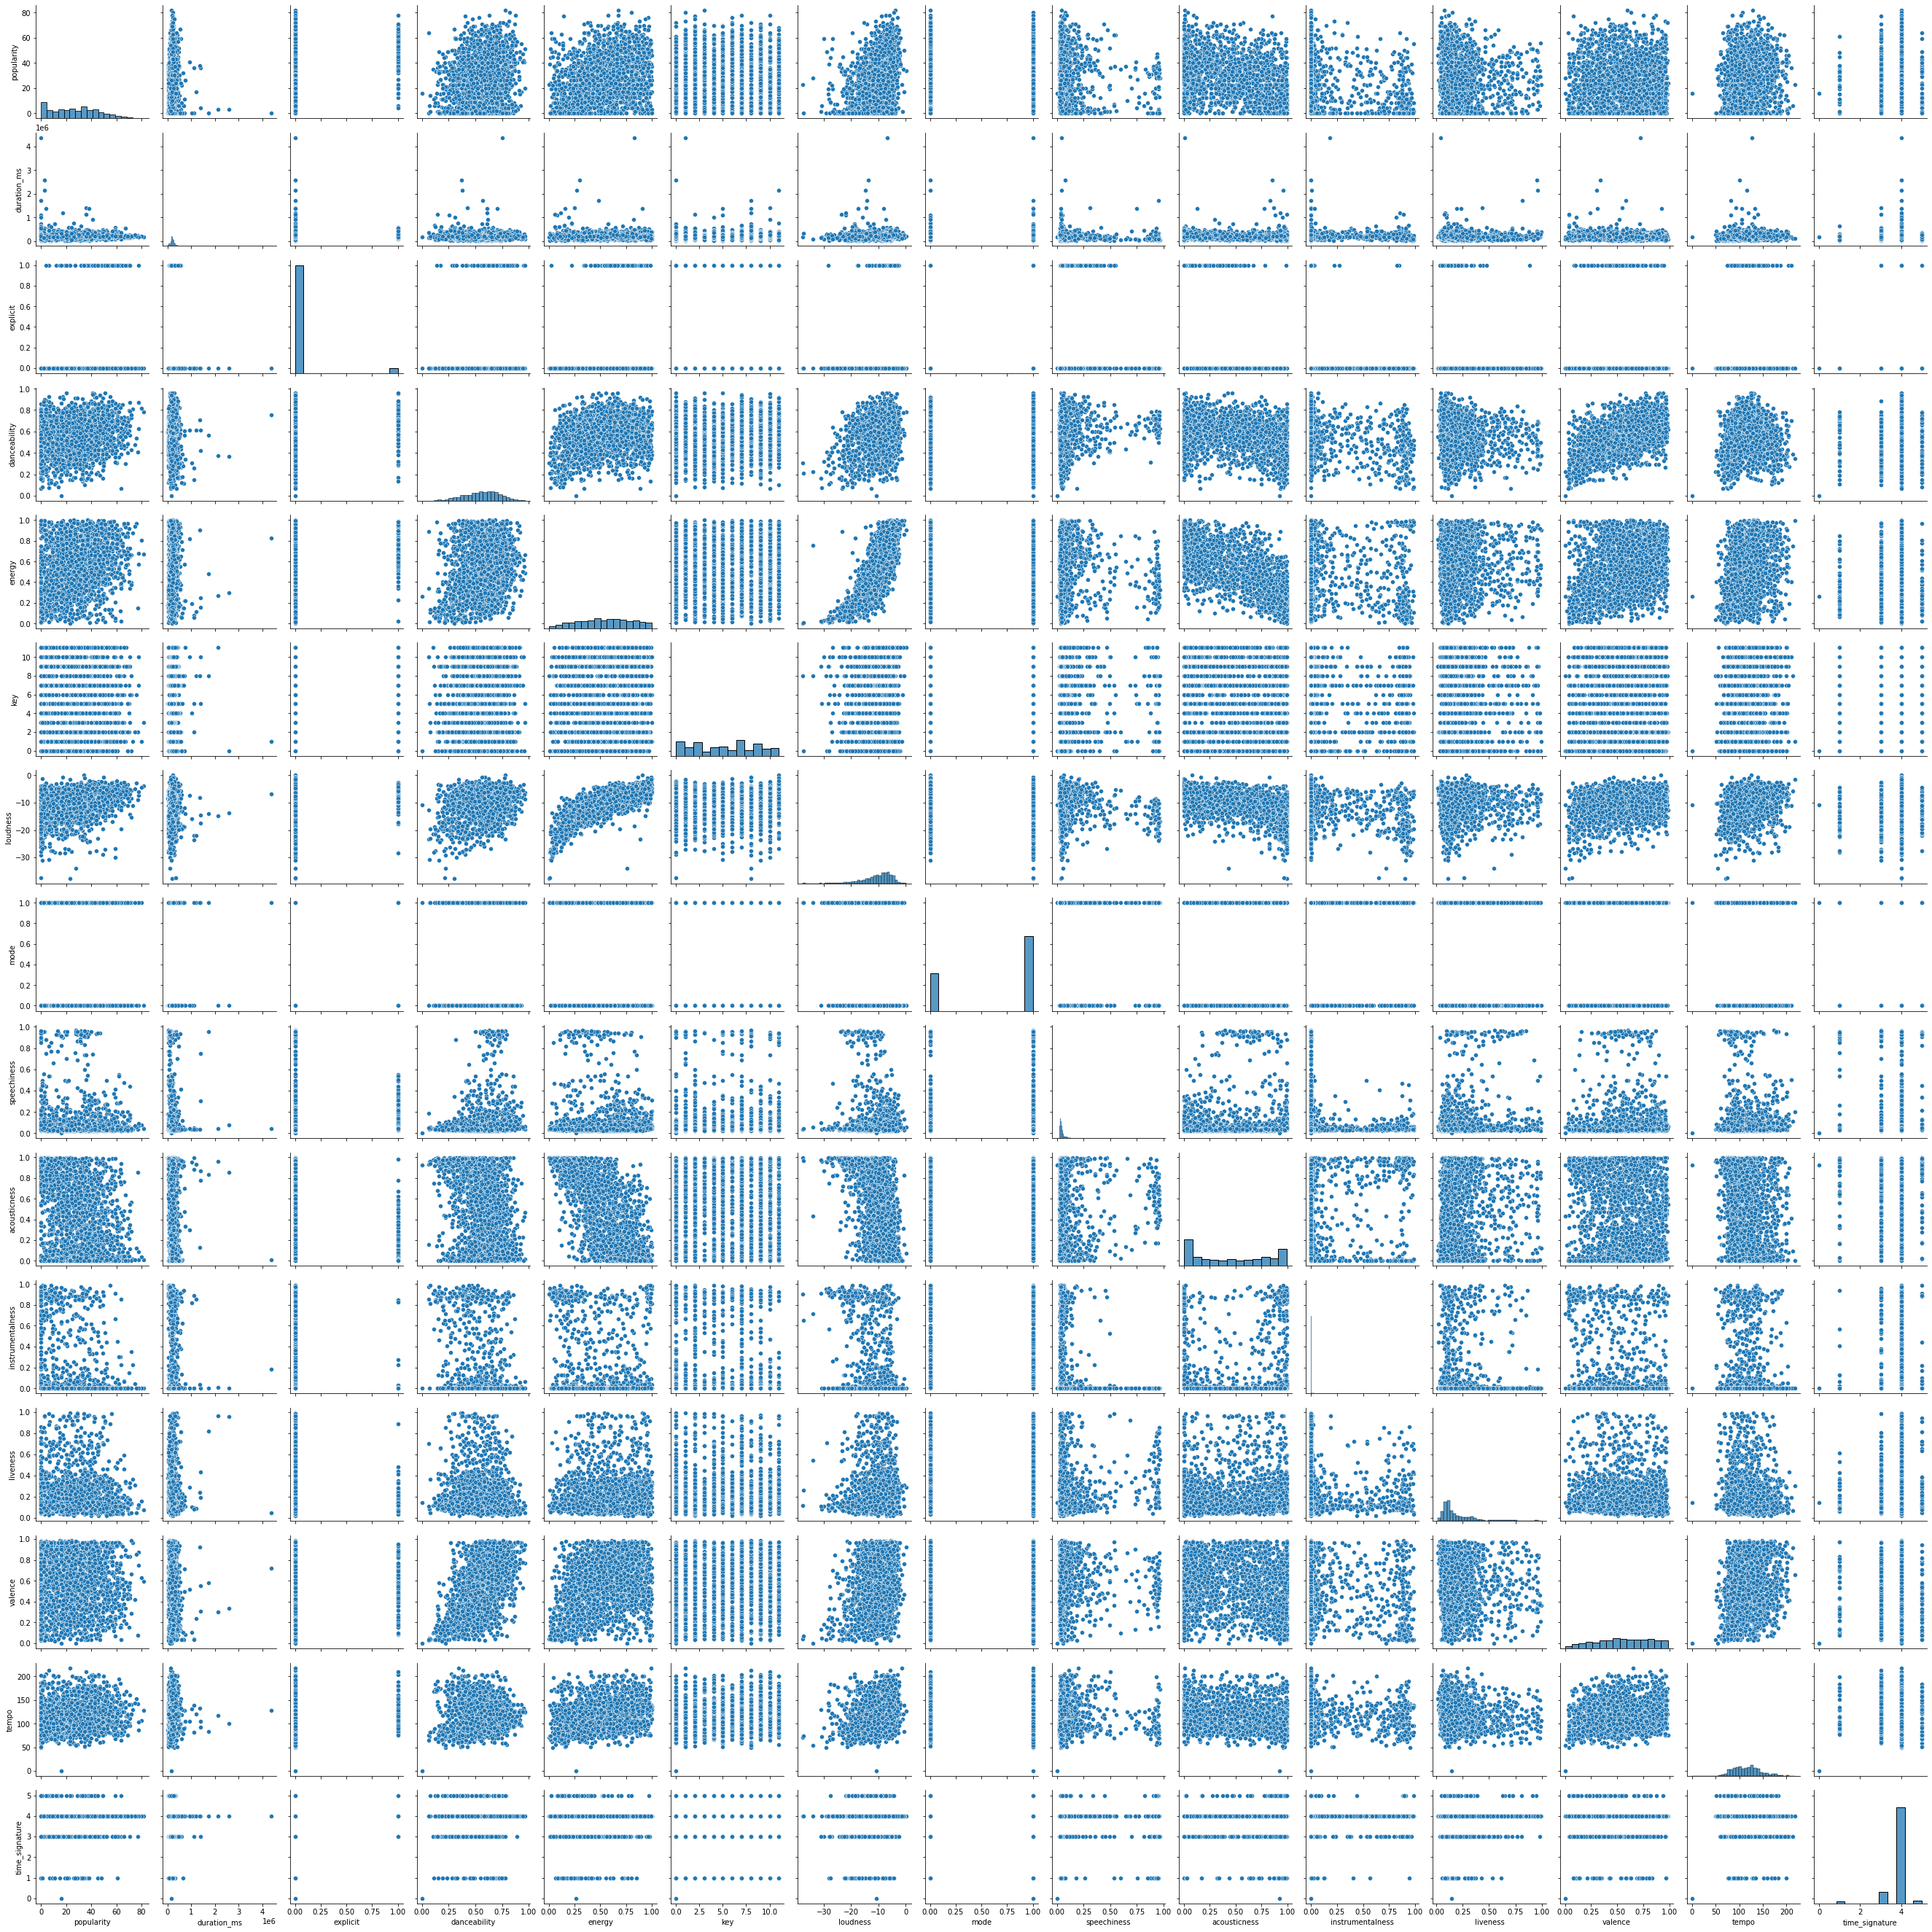

In [54]:
sns.pairplot(numerical_features.sample(2000))
plt.show()

artists
['Die drei ???']                                                                      140705
['TKKG Retro-Archiv']                                                                  58554
['Bibi Blocksberg']                                                                    50096
['Benjamin Blümchen']                                                                  42371
['Bibi und Tina']                                                                      32037
                                                                                       ...  
['Steve Kusaba']                                                                           0
['William Walton', 'Edith Sitwell', 'Frederik Prausnitz', 'The Chamber Orchestra']         0
['Charlie Glasspool and the Big Love']                                                     0
['Misael Morato']                                                                          0
['Else Marie & Ellen Gottschalch m.fl.']                      

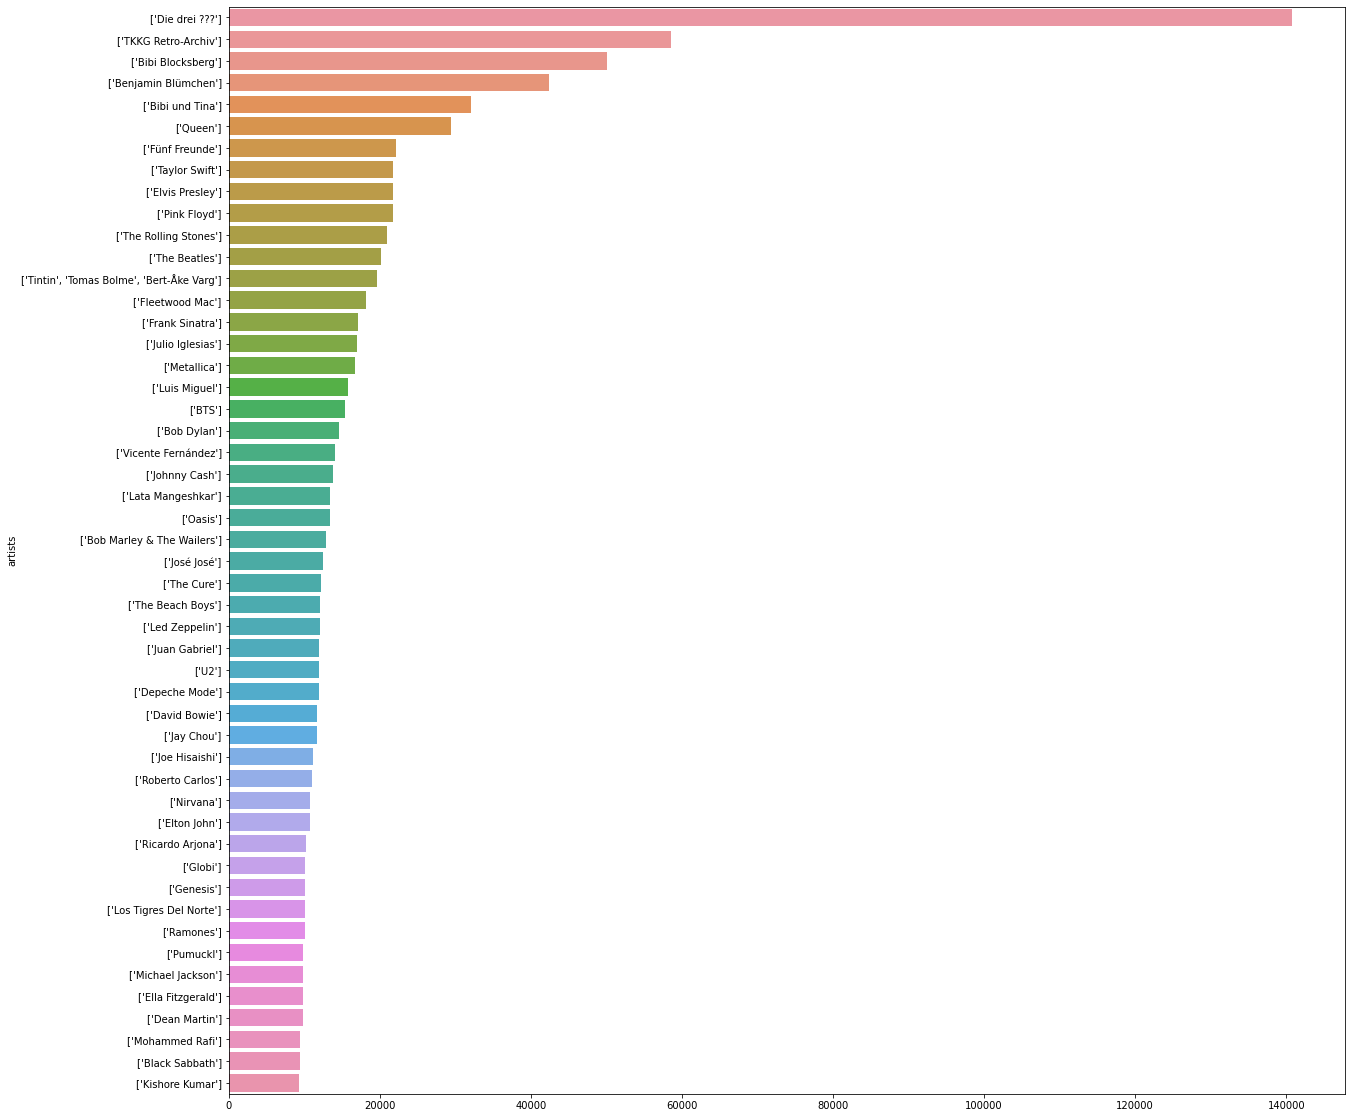

In [85]:
artists_by_popularity = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)
print(artists_by_popularity)

top_50 = artists_by_popularity.head(50)

print(top_50.index, top_50.values)


fig, ax = plt.subplots(figsize=(20, 20))


ax = sns.barplot(x=top_50.values, y=top_50.index, ax=ax)

plt.show()

In [93]:
df['popular_artist'] = df['artists'].map(df['artists'].value_counts() > 100)

print(df['popular_artist'])


pop_artists = df.loc[df['popular_artist'] == True].copy()

pop_artists = pop_artists.groupby("artists")['popularity'].mean().sort_values(ascending=False)

print(pop_artists.head(10).values)
print(pop_artists.head(10).index)

0         False
1         False
2          True
3          True
4         False
          ...  
586667    False
586668    False
586669    False
586670    False
586671    False
Name: popular_artist, Length: 586672, dtype: bool
[62.68932039 60.72980501 60.02803738 59.48262548 58.3028169  58.12765957
 56.62857143 55.88429752 55.83168317 52.46875   ]
Index(['['Drake']', '['Taylor Swift']', '['Arctic Monkeys']', '['BTS']',
       '['Eminem']', '['Lana Del Rey']', '['Ed Sheeran']', '['Linkin Park']',
       '['PNL']', '['Jorge & Mateus']'],
      dtype='object', name='artists')


/Users/giumast/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


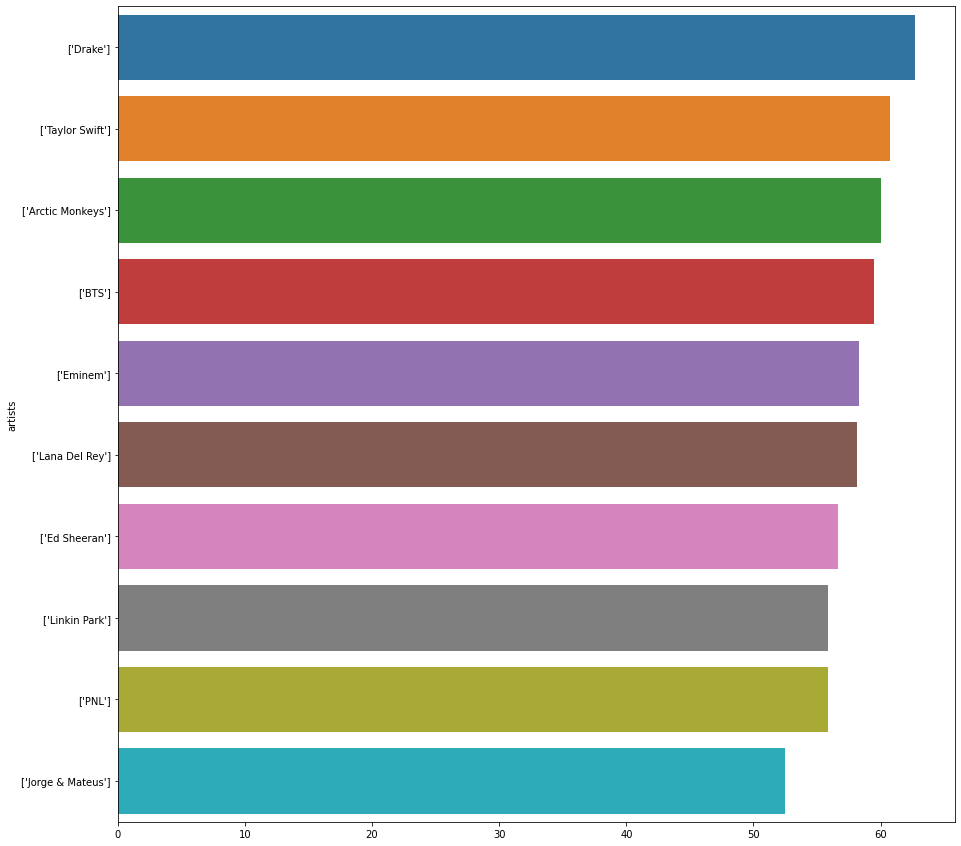

In [94]:
fig, ax = plt.subplots(figsize=(15, 15))

top_ten = pop_artists.head(10)

ax = sns.barplot(top_ten.values, top_ten.index, ax = ax)

plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [96]:
df = df.drop('id', axis=1)

In [98]:
df = df.drop('id_artists', axis=1)
df = df.drop('name', axis=1)
df = df.drop('artists', axis=1)
df = df.drop('popular_artists', axis=1)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586672 non-null  int64  
 1   duration_ms       586672 non-null  int64  
 2   explicit          586672 non-null  int64  
 3   release_date      586672 non-null  object 
 4   danceability      586672 non-null  float64
 5   energy            586672 non-null  float64
 6   key               586672 non-null  int64  
 7   loudness          586672 non-null  float64
 8   mode              586672 non-null  int64  
 9   speechiness       586672 non-null  float64
 10  acousticness      586672 non-null  float64
 11  instrumentalness  586672 non-null  float64
 12  liveness          586672 non-null  float64
 13  valence           586672 non-null  float64
 14  tempo             586672 non-null  float64
 15  time_signature    586672 non-null  int64  
 16  popular_artist    58

In [102]:
df['release_date'] = (datetime.datetime.now() - pd.to_datetime(df['release_date'])).dt.days



In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586672 non-null  int64  
 1   duration_ms       586672 non-null  int64  
 2   explicit          586672 non-null  int64  
 3   release_date      586672 non-null  int64  
 4   danceability      586672 non-null  float64
 5   energy            586672 non-null  float64
 6   key               586672 non-null  int64  
 7   loudness          586672 non-null  float64
 8   mode              586672 non-null  int64  
 9   speechiness       586672 non-null  float64
 10  acousticness      586672 non-null  float64
 11  instrumentalness  586672 non-null  float64
 12  liveness          586672 non-null  float64
 13  valence           586672 non-null  float64
 14  tempo             586672 non-null  float64
 15  time_signature    586672 non-null  int64  
 16  popular_artist    58

In [104]:
y = df.loc[:, df.columns == 'popularity'].values
x = df.loc[:, df.columns != 'popularity'].values

In [107]:
limit = int(len(x) * 0.8)

In [108]:
agent = DecisionTreeRegressor(random_state=42)

agent.fit(x[:limit], y[:limit])


y_pred = agent.predict(x[limit:])


mean_absolute_error(y[limit:], y_pred)

13.213611173370412

In [117]:
features = df.loc[:, df.columns != "popularity"].columns.to_list()
exp = export_text(agent, feature_names=features)

print(exp)

|--- release_date <= 20902.00
|   |--- release_date <= 8445.00
|   |   |--- instrumentalness <= 0.20
|   |   |   |--- explicit <= 0.50
|   |   |   |   |--- release_date <= 369.50
|   |   |   |   |   |--- release_date <= 359.50
|   |   |   |   |   |   |--- release_date <= 358.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- release_date >  358.50
|   |   |   |   |   |   |   |--- loudness <= -5.64
|   |   |   |   |   |   |   |   |--- speechiness <= 0.03
|   |   |   |   |   |   |   |   |   |--- time_signature <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- value: [23.00]
|   |   |   |   |   |   |   |   |   |--- time_signature >  3.50
|   |   |   |   |   |   |   |   |   |   |--- acousticness <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- value: [28.00]
|   |   |   |   |   |   |   |   |   |   |--- acousticness >  0.16
|   |   |   |   |   |   |   |   |   |   |   |--- value: [26.00]
|   |   |   |   |   |   |   |   |--- speechiness >  0.03
|   |   |